In [28]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("study.csv")
df.head()

,29/04/2023,gender\nstudent's sex (binary: 'F' - female or 'M' - male),age\nstudent's age (numeric: from 15 to 22),adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural),famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart),M_Education,F_education,"Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other","Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",relationship_breakdown,smoker,avarage_tution_fee_cost,time_spent_with_friends,ssc_result,hsc_result
0,29/04/2023,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,29/04/2023,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,29/04/2023,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,29/04/2023,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,29/04/2023,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


In [30]:
df = df.drop('29/04/2023', axis=1)

In [31]:
df['time_spent_with_friends'] = pd.to_numeric(df['time_spent_with_friends'], errors='coerce')
mean_value = int(df['time_spent_with_friends'].mean().round())
df['time_spent_with_friends'] = df['time_spent_with_friends'].fillna(mean_value)
df['time_spent_with_friends'] = df['time_spent_with_friends'].astype(int)

In [32]:
df = df.rename(columns={
    "gender\nstudent's sex (binary: 'F' - female or 'M' - male)": "gender",
    "age\nstudent's age (numeric: from 15 to 22)": "age",
    "adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural)": "address",
    "famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)": "fam_size",
    "Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart)": "parent_status",
    "Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other": "m_job",
    "Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other": "f_job",
    "M_Education": "m_edu",
    "F_education": "f_edu"
})


In [33]:
df.columns.tolist()

['gender',
 'age',
 'address',
 'fam_size',
 'parent_status',
 'm_edu',
 'f_edu',
 'm_job',
 'f_job',
 'relationship_breakdown',
 'smoker',
 'avarage_tution_fee_cost',
 'time_spent_with_friends',
 'ssc_result',
 'hsc_result']

In [34]:
df['parent_status'] = df['parent_status'].str.strip()
print(df['parent_status'].value_counts(dropna=False))

df['smoker'] = df['smoker'].str.strip().str.capitalize()
print(df['smoker'].value_counts(dropna=False))

df['relationship_breakdown'] = df['relationship_breakdown'].str.strip().str.capitalize()
print(df['relationship_breakdown'].value_counts(dropna=False))

df['m_job'] = df['m_job'].str.strip().str.capitalize()
print(df['m_job'].value_counts(dropna=False))

df['f_job'] = df['f_job'].str.strip().str.capitalize()
print(df['f_job'].value_counts(dropna=False))

parent_status
T    2028
A      95
Name: count, dtype: int64
smoker
Yes    1063
No     1060
Name: count, dtype: int64
relationship_breakdown
Yes    1232
No      891
Name: count, dtype: int64
m_job
At_home     1095
Other        275
Teacher      273
Services     265
Health       215
Name: count, dtype: int64
f_job
Other       576
Services    521
Teacher     514
Health      487
At_home      25
Name: count, dtype: int64


In [35]:
df['gender'] = df['gender'].map({'M':1, 'F':0})
df['address'] = df['address'].map({'U':1, 'R':0})
df['fam_size'] = df['fam_size'].map({'LE3':0, 'GT3':1})
df['parent_status'] = df['parent_status'].map({'T':1, 'A':0})
df['relationship_breakdown'] = df['relationship_breakdown'].map({'Yes':1, 'No':0})
df['smoker'] = df['smoker'].map({'Yes':1, 'No':0})

In [36]:
df = df.drop(['m_job', 'f_job'],  axis=1)

In [45]:
def gpa_to_grade(gpa):
    if gpa >= 5.00:
        return 'A+'
    elif gpa >= 4.00:
        return 'A'
    elif gpa >= 3.50:
        return 'A-'
    elif gpa >= 3.00:
        return 'B'
    elif gpa >= 2.00:
        return 'C'
    elif gpa >= 1.00:
        return 'D'
    else:
        return 'F'

df['hsc_result_class'] = df['hsc_result'].apply(gpa_to_grade)

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['hsc_result_label'] = label_encoder.fit_transform(df['hsc_result_class'])

In [47]:
df.columns

Index(['gender', 'age', 'address', 'fam_size', 'parent_status', 'm_edu',
       'f_edu', 'relationship_breakdown', 'smoker', 'avarage_tution_fee_cost',
       'time_spent_with_friends', 'ssc_result', 'hsc_result',
       'hsc_result_class', 'hsc_result_label'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop(['hsc_result','hsc_result_class','hsc_result_label'], axis=1)
y = df['hsc_result_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X.columns

Index(['gender', 'age', 'address', 'fam_size', 'parent_status', 'm_edu',
       'f_edu', 'relationship_breakdown', 'smoker', 'avarage_tution_fee_cost',
       'time_spent_with_friends', 'ssc_result'],
      dtype='object')

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['age', 'm_edu','f_edu', 'avarage_tution_fee_cost','time_spent_with_friends', 'ssc_result']
mms = MinMaxScaler()
X_train[scaleVars] = mms.fit_transform(X_train[scaleVars])
X_test[scaleVars] = mms.transform(X_test[scaleVars])

In [51]:
y_train.head()

583     0
2088    1
351     0
1822    0
1499    0
Name: hsc_result_label, dtype: int32

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import pandas as pd

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVC': SVC(random_state=20, probability=True),
        'Random Forest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
        'XGBoost': XGBClassifier(eval_metric='mlogloss')
    }

    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

    for name, clf in classifiers.items():
        clf.fit(train_X, train_y)
        preds = clf.predict(test_X)

        accuracy = accuracy_score(test_y, preds)
        precision = precision_score(test_y, preds, average='weighted', zero_division=0)
        recall = recall_score(test_y, preds, average='weighted', zero_division=0)
        f1 = f1_score(test_y, preds, average='weighted', zero_division=0)

        results.loc[name] = [accuracy, precision, recall, f1]

    return results


In [65]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
KNN                  0.898824   0.831546  0.898824  0.859102
Decision Tree        0.870588   0.862342  0.870588  0.866044
Logistic Regression  0.908235   0.846017  0.908235  0.873685
SVC                  0.903529   0.841210  0.903529  0.864926
Random Forest        0.927059   0.865969  0.927059  0.895473
AdaBoost             0.927059   0.865969  0.927059  0.895473
XGBoost              0.922353   0.861316  0.922353  0.890645


In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def draw_decision_tree(decision_tree, feature_names=None, class_names=None):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

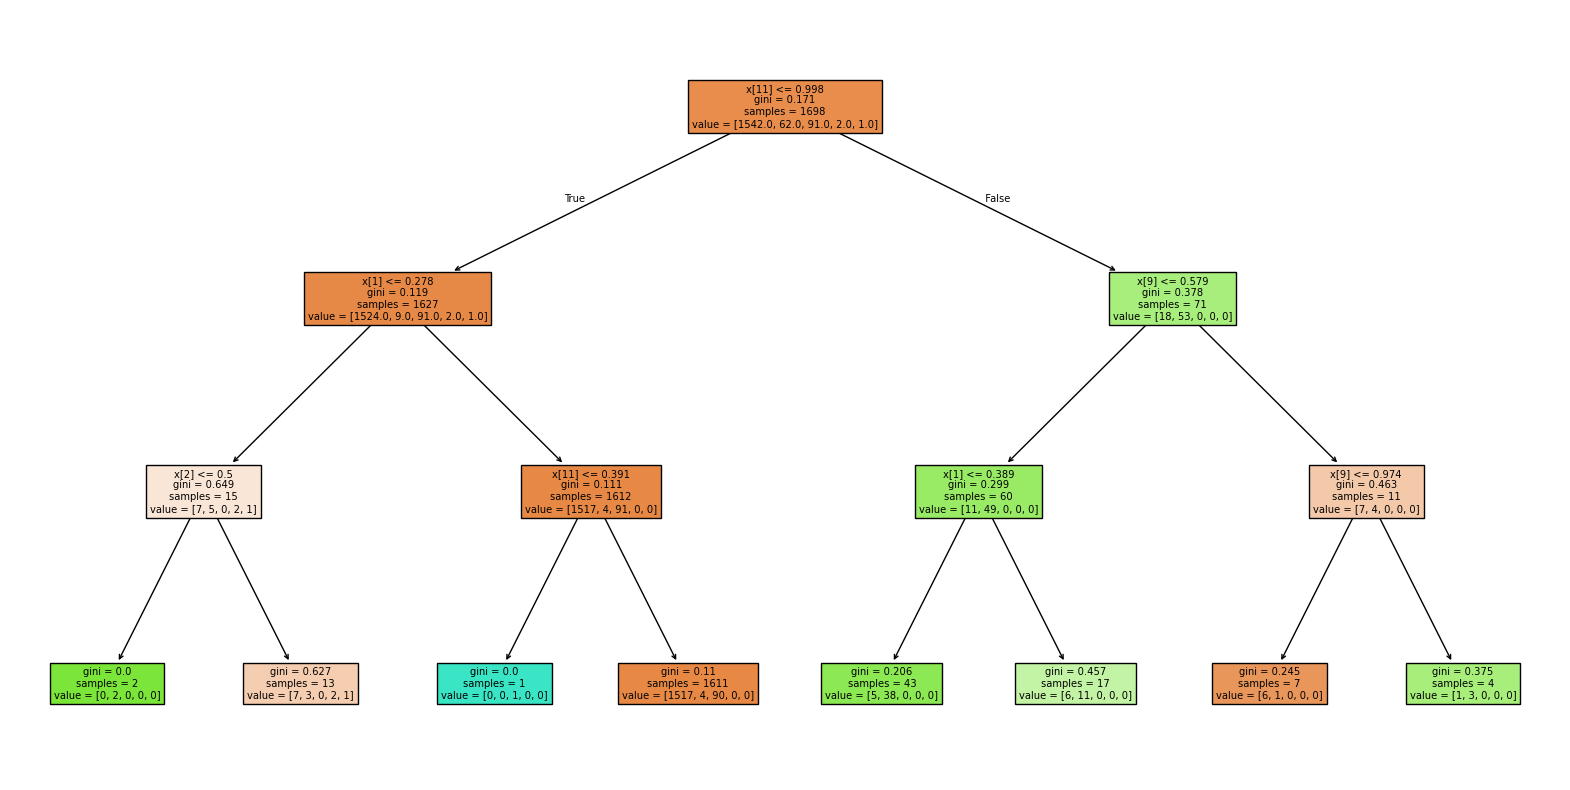

In [ ]:
feature_names = [str(name) for name in X_train.columns]
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
draw_decision_tree(dt)

In [ ]:
# from sklearn.tree import export_graphviz
# from pathlib import Path

# IMAGES_PATH = Path() / "images" / "Project"
# IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# export_graphviz(
#     dt,
#     out_file=str(IMAGES_PATH / "decision_tree.dot"),
#     feature_names=X_train.columns,
#     class_names=[str(cls) for cls in dt.classes_],
#     rounded=True,
#     filled=True
#)


In [66]:
def show_model_predictions(train_X, train_y, test_X, label_encoder):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVC': SVC(random_state=20, probability=True),
        'Random Forest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
        'XGBoost': XGBClassifier(eval_metric='mlogloss')
    }

    for name, clf in classifiers.items():
        clf.fit(train_X, train_y)
        y_pred = clf.predict(test_X)
        decoded_preds = label_encoder.inverse_transform(y_pred)

        print(f"\n{name} Predictions:")
        print(decoded_preds[:10])  # Show first 10 predictions

In [67]:
show_model_predictions(X_train, y_train, X_test, label_encoder)


KNN Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

Decision Tree Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

Logistic Regression Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

SVC Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

Random Forest Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

AdaBoost Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

XGBoost Predictions:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']


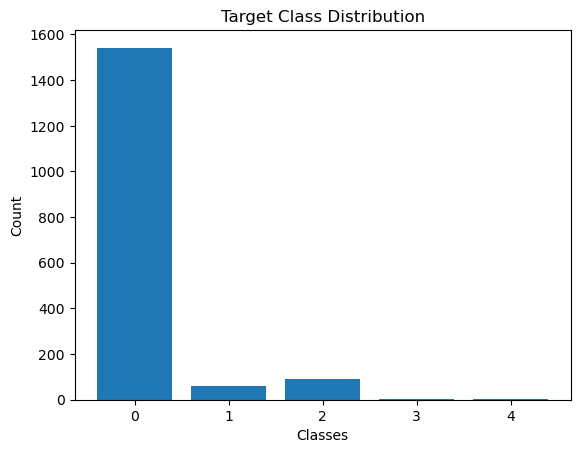

In [68]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Target Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()